# Data Science in Cities

In [33]:
import geopandas as gpd
import matplotlib.pyplot as plt
import osmnx as ox
import networkx as nx
import pandas as pd

Text(0.5, 179.43248294118163, 'Longitude')

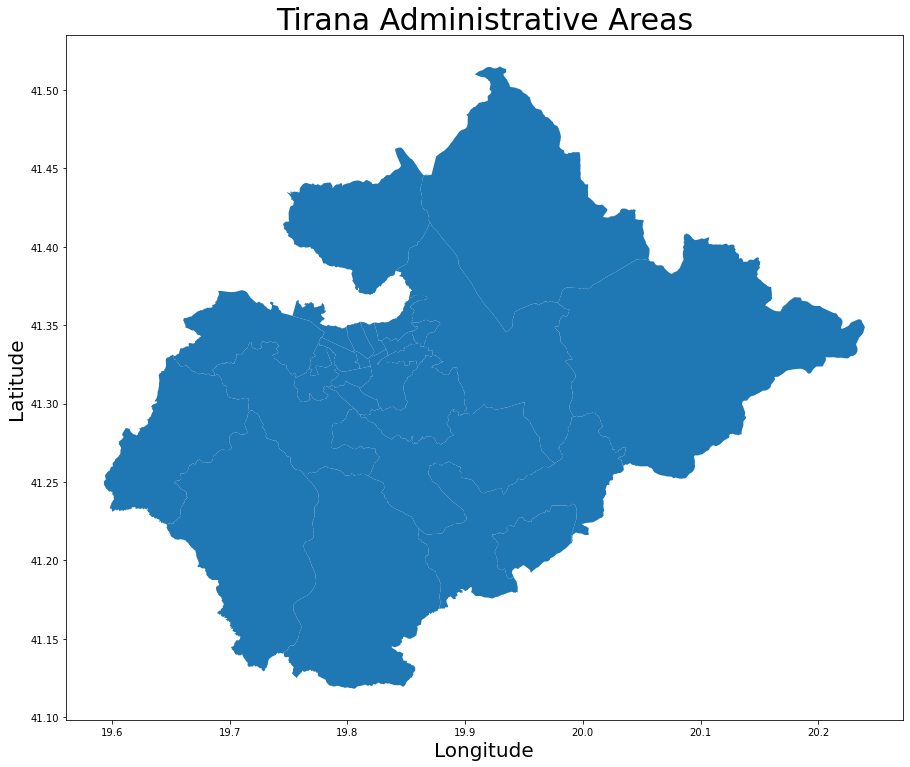

In [34]:
states = gpd.read_file('njesia_2.geojson')
fig, ax = plt.subplots(figsize = (15,15))
states.plot(ax=ax)
ax.set_title('Tirana Administrative Areas',fontdict = {'fontsize': 30})
ax.set_ylabel('Latitude',fontdict = {'fontsize': 20})
ax.set_xlabel('Longitude',fontdict = {'fontsize': 20})

In [4]:
import pandas as pd
pa = pd.read_csv("pop2020 (1).csv")
population_list_of_11 = pa.Popullsia_2020.tolist()
pa.head()

,Longitude,Latitude,"NJESIA_ADM,C,254",Popullsia_2020,Femra_2020,%_Femrave_2020
0,19.8302,41.3259,Nja.1,51816,26360,50.90%
1,19.8303,41.3259,Nja.2,83371,42372,50.80%
2,19.8296,41.3390,Nja.3,45391,23228,51.20%
3,19.8296,41.3390,Nja.4,65511,33315,50.90%
4,19.8156,41.3198,Nja.5,87312,44866,51.40%


In [5]:
#calculating densities
list_surfaces = [3.06, 9.58, 2.01, 4.92, 2.87, 5.48, 3.06, 1.95, 2.82, 0.77, 5.21]

In [6]:
df_pop_ad = pd.DataFrame(data = {"Population": population_list_of_11[:11] , "Area": list_surfaces})

In [7]:
p = states.geometry.tolist()
df_pop_ad["Density"] = df_pop_ad.Population/df_pop_ad.Area
df_pop_ad["geometry"] = [p[11],p[14],p[15], p[16], p[17], p[18], p[19], p[20], p[21], p[12], p[13]]
df_pop_ad.head()

,Population,Area,Density,geometry
0,51816,3.06,16933.333333,"POLYGON Z ((19.86189 41.338498 0, 19.861835 41..."
1,83371,9.58,8702.609603,"POLYGON Z ((19.833797 41.330171 0, 19.831824 4..."
2,45391,2.01,22582.587065,"POLYGON Z ((19.856207 41.340581 0, 19.856403 4..."
3,65511,4.92,13315.243902,"POLYGON Z ((19.859213 41.368606 0, 19.863136 4..."
4,87312,2.87,30422.299652,"POLYGON Z ((19.820595 41.320587 0, 19.820691 4..."


<AxesSubplot:>

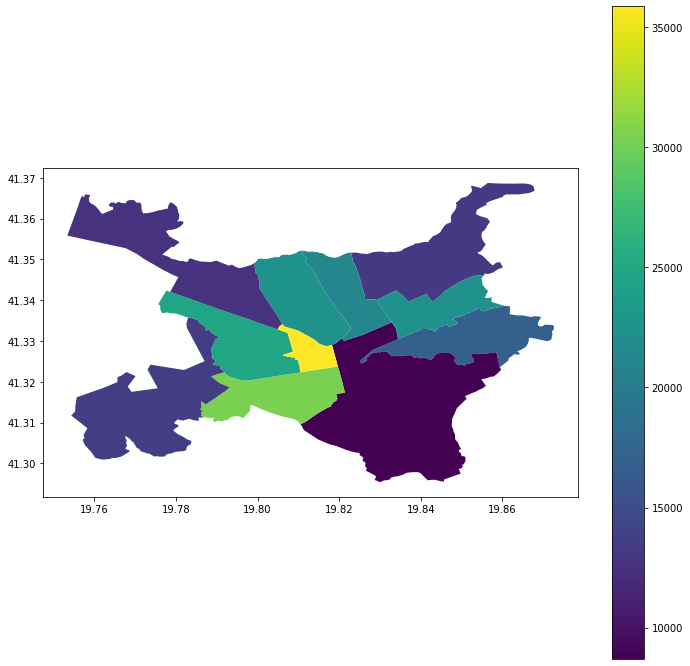

In [17]:
from geopandas import GeoDataFrame
fig, ax = plt.subplots(figsize = (12,12))
df_pop_ad = GeoDataFrame(df_pop_ad)
df_pop_ad.plot(column="Density",legend=True, ax = ax)

The map above shows Tirana's 11 administrative areas, and the corresponding population densities for each of them. Notably, the distribution of densities isn't at all similar across the areas. One area in particular has comparably high density (colored in yellow). Let's take a look at which one it is:

In [8]:
df_pop_ad_only_1 = df_pop_ad[df_pop_ad.Density >= 35000]
df_pop_ad_only_1.head()

,Population,Area,Density,geometry
9,27608,0.77,35854.545455,"POLYGON Z ((19.81824 41.32906 0.00000, 19.8185..."


From the output, it seems like the 10th administrative area has the highest density of all areas. This raises the question whether this area is also more polluted, or experiences higher amount of traffic. Additionally, because it is more populated, can it in fact have more resources allocated to it, such as schools or green spaces?

Some other areas, on the other hand, seem to have slightly lower population density. To look at them, let's first calculate the mean density, and then look at which areas have a density lower than that.

In [9]:
import numpy as np
mean_dens = np.mean(df_pop_ad.Density)
mean_dens

20229.54889607044

In [10]:
df_pop_ad_lower = df_pop_ad[df_pop_ad.Density <= mean_dens]
df_pop_ad_lower.head()

,Population,Area,Density,geometry
0,51816,3.06,16933.333333,"POLYGON Z ((19.86189 41.33850 0.00000, 19.8618..."
1,83371,9.58,8702.609603,"POLYGON Z ((19.83380 41.33017 0.00000, 19.8318..."
3,65511,4.92,13315.243902,"POLYGON Z ((19.85921 41.36861 0.00000, 19.8631..."
5,74135,5.48,13528.284672,"POLYGON Z ((19.75568 41.31622 0.00000, 19.7615..."
10,65279,5.21,12529.558541,"POLYGON Z ((19.75880 41.36537 0.00000, 19.7587..."


So we see that 5 of the areas have a lower than average density, with entry 1, or Area 2 having the lowest one of all. In the map, this corresponds to the dark purple zone. Similar to the questions we raised about Area 9, it will be interesting to see whether the population density corresponds to the amount of investments or resource allocation.

Additonally, to get a better sense of how Tirana compares to other countries' capitals we also should look at the data from other cities. Below, I have imported a csv of population counts from the Ourworldindata.com: 

In [11]:
un_pop = pd.read_csv("population-density-by-city.csv")
un_pop = un_pop.rename({'Population density by city': 'Density'}, axis=1)
un_pop.head()

,Entity,Code,Year,Density
0,Abidjan,NaN,2014,14700
1,Accra,NaN,2014,4300
2,Ahmedabad,NaN,2014,19800
3,Alexandria,NaN,2014,15600
4,Ankara,NaN,2014,6500


In [12]:
mean_dens_world = np.mean(un_pop.Density)
mean_dens_world

7465.2

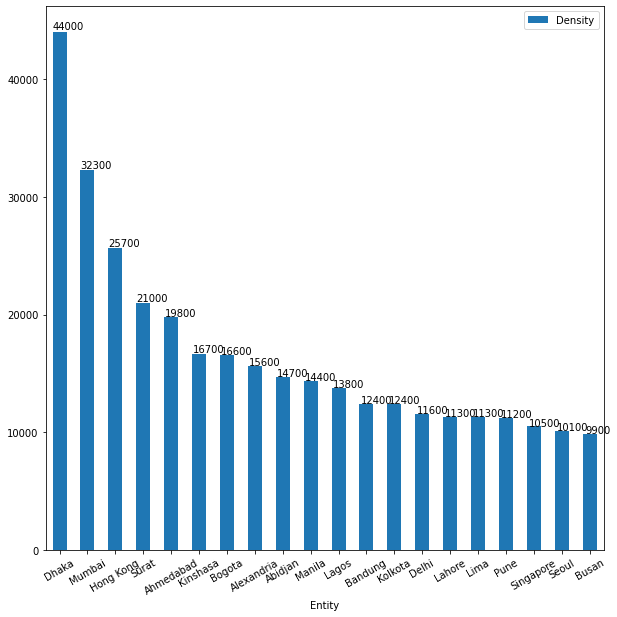

In [13]:
fig, ax = plt.subplots(figsize = (10,10))
sorted_un = un_pop.sort_values(by=['Density'], ascending = False)
sorted_un.head(20).plot.bar(x='Entity', y='Density', rot=0, ax=ax)
plt.xticks(rotation=30, horizontalalignment="center")
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

# Urban Tirana

## Green Areas

https://opendata.tirana.al/?q=dataset/parqet-dhe-zonat-rekreative-n%C3%AB-tiran%C3%AB-2020/resource/parqet-dhe-zonat-rekreative-n%C3%AB-tiran%C3%AB#{view-graph:{graphOptions:{hooks:{processOffset:{},bindEvents:{}}}},graphOptions:{hooks:{processOffset:{},bindEvents:{}}},view-grid:{columnsWidth:[{column:!Treguesi,width:372}]}}

In [14]:
green_2 = gpd.read_file('map (5).geojson')

<AxesSubplot:>

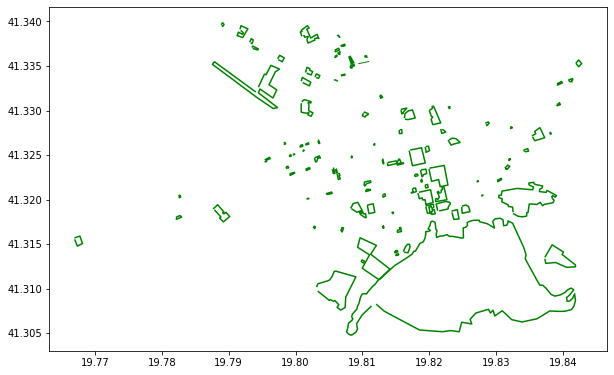

In [15]:
fig, ax = plt.subplots(figsize = (10,10))
green_2.plot(ax=ax, color="green")

Now that we have a model of green spaces in urban Tirana, let's calculate their respective areas using the area package:

In [16]:
import shapely
type(green_2.geometry.iloc[1])

shapely.geometry.linestring.LineString

In [17]:
coords = []
import numpy as np
for i in range(len(green_2.index)):
    if type(green_2.geometry.iloc[i]) == shapely.geometry.linestring.LineString:
        l = list(green_2.geometry.iloc[i].coords)
        coords.append(np.radians(l))
        

In [18]:
from pyproj import Proj
pa = Proj("+proj=aea +lat_1=37.0 +lat_2=41.0 +lat_0=39.0 +lon_0=-106.55")
area_greens = []
for i in range(len(coords)):
    cop = {"type": "Polygon", "coordinates": [coords[i]]}
    from shapely.geometry import shape
    area_greens.append(shape(cop).area*6370**2)
    

In [19]:
max(area_greens)

2.9083760646900587

In [20]:
sum(area_greens)

4.078872815753409

Interestingly, about 4 square kilometers of Tirana seem to be green spaces, i.e. parks, recreational areas, sports fields. That amounts to 4/41.8 (or about 10 percent) of the total urban area. How does it compare to other capitals? Below, I have imported some data about world cities' green ara percentage. . Tirana actually scores higher than cities like Paris (with 9.5% green areas) but significantly lower when compared to other European capitals like London or Vienna.

In [21]:
green_by_city = pd.read_csv("%_of_public_green_space_(parks_and_gardens)_17062020.csv")
green_by_city.sort_values(by=["Figure"], ascending = False).head(10)

,City,Figure,Per capita,Date,Source,Notes
25,Paris,9.50%,NaN,2013,IAU Ile-de-France,NaN
5,Buenos Aires,9.40%,NaN,2018,Estadísticas y Censos,NaN
35,Tokyo,7.50%,NaN,2015,Bureau of Urban Development,Survey of City Planning Park and Green Space i...
24,Oslo,68.00%,NaN,2018,"Bymiljøetaten, Oslo kommune",NaN
31,Singapore,47.00%,NaN,2011,National Parks Board,NaN
33,Sydney,46.00%,NaN,2010,New South Wales Department of Planning,NaN
37,Vienna,45.50%,NaN,2014,Vienna Annual Statistics 2014,NaN
7,Chengdu,42.30%,NaN,2017,Statistics Bureau of Chengdu,NaN
39,Zürich,41.00%,NaN,2018,Grün Stadt Zürich,NaN
30,Shenzhen,40.90%,NaN,2016,Shenzhen Statistical Yearbook,NaN


In [22]:
s = list(green_by_city.Figure)
new_s = []
for i in range(len(s)):
    i = str(i)
    i = float(i.strip("%"))
    new_s.append(i)
green_by_city["Fixed"] = new_s  
green_by_city.head()

,City,Figure,Per capita,Date,Source,Notes,Fixed
0,Amsterdam,13.00%,NaN,2018,Statistics Netherlands/TNO,NaN,0.0
1,Austin,11.00%,NaN,2018,The Trust for Public land ParkScore 2018,NaN,1.0
2,Barcelona,11.00%,NaN,2019,Department of Statistics. Barcelona City Council,NaN,2.0
3,Bogotá,4.90%,NaN,2017,Departamento Administrativo de la Defensoría d...,NaN,3.0
4,Brussels,18.80%,NaN,2015,IBGE,NaN,4.0


<b>Question: is there enough green area per person in Tirana? What about in the administrative area level? How has that changed?</b>

To answer this part, there needs to be some kind of normalized metric: how about population density divided by percentage of green space? Let's see what that outputs. First, the function below calculates this specific metric for the cities which appear in the green areas dataset, then it outputs a visualization.

In [50]:
un_pop_cities_list = un_pop.Entity
green_cities_list = list(green_by_city.City)
cities_list = []
metric = []
for city in un_pop_cities_list:
    if city in green_cities_list:
        cities_list.append(city)
        metric.append(int((un_pop[un_pop.Entity == city].Density))/(int(green_by_city[green_by_city.City == city].Fixed)))

In [51]:
tirana_metric = mean_dens/10
metric.append(tirana_metric)
fixed = []
for m in metric:
    m = 1/m
    fixed.append(m)

cities_list.append("Tirana")


In [53]:
d = {"Cities": cities_list , "Metric": fixed}
new_df = pd.DataFrame(data = d)
new_df.sort_values(by=["Metric"]).head()

,Cities,Metric
0,Barcelona,0.000465
4,Hong Kong,0.000467
25,Tirana,0.000494
2,Chengdu,0.000864
1,Buenos Aires,0.000943


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'Barcelona'),
  Text(1, 0, 'Hong Kong'),
  Text(2, 0, 'Tirana'),
  Text(3, 0, 'Chengdu'),
  Text(4, 0, 'Buenos Aires'),
  Text(5, 0, 'Istanbul'),
  Text(6, 0, 'Guangzhou'),
  Text(7, 0, 'London'),
  Text(8, 0, 'Seoul'),
  Text(9, 0, 'Singapore'),
  Text(10, 0, 'Shenzhen'),
  Text(11, 0, 'Nanjing'),
  Text(12, 0, 'Johannesburg'),
  Text(13, 0, 'Shanghai'),
  Text(14, 0, 'Taipei'),
  Text(15, 0, 'Moscow'),
  Text(16, 0, 'Paris'),
  Text(17, 0, 'Milan'),
  Text(18, 0, 'Los Angeles'),
  Text(19, 0, 'Rome')])

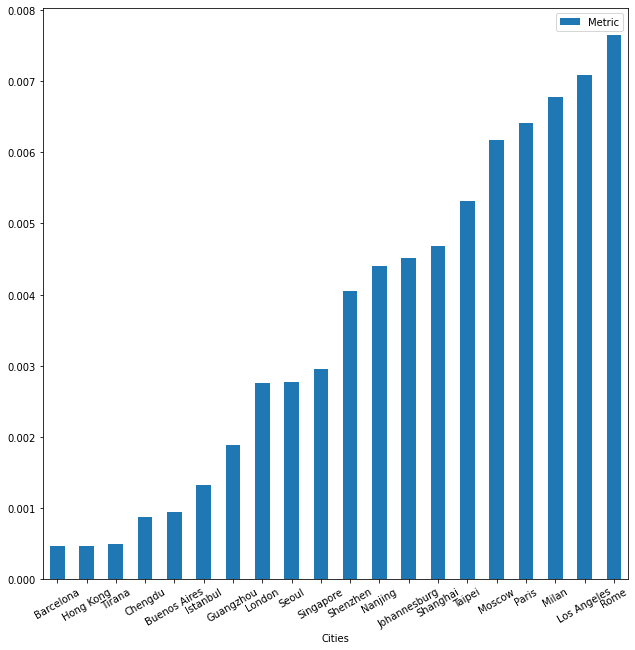

In [55]:
fig, ax = plt.subplots(figsize = (10.5,10.5))
sorted_un_f = new_df.sort_values(by=['Metric'], ascending = True)
sorted_un_f.head(20).plot.bar(x='Cities', y='Metric', rot=0, ax=ax)
plt.xticks(rotation=30, horizontalalignment="center")

<b>But how are these green spaces spread out?</b> Before delving into the data, my intution tells me that area 2 will have the highest "spread" since it also contains the Artifical Lake. I also expect area 10 to have a pretty high concentration of green space just by annecdotal evidence and what I have seen across the city.

In [33]:
geometries_only = list(df_pop_ad.geometry)
geo_only = list(green_2.geometry)
geo_only += geometries_only
df_geoms = pd.DataFrame(data = {"geometry": geo_only})
type(df_geoms.geometry.iloc[1])

shapely.geometry.linestring.LineString

/opt/conda/lib/python3.8/site-packages/geopandas/plotting.py:678: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


<AxesSubplot:>

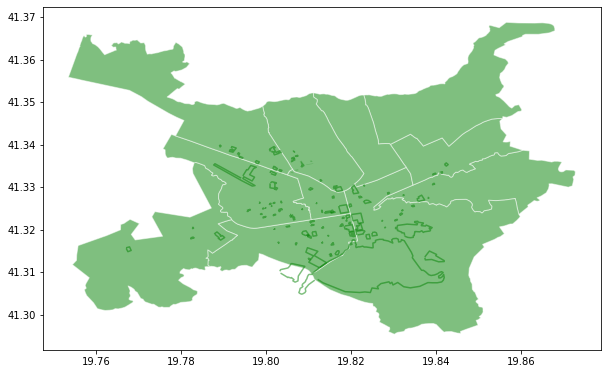

In [34]:
df_geoms = GeoDataFrame(df_geoms)
poly_gdf = df_geoms[df_geoms.geometry != shapely.geometry.linestring.LineString]
line_gdf = df_geoms[df_geoms.geometry == shapely.geometry.linestring.LineString]
fig, ax = plt.subplots(figsize = (10,10))
poly_gdf.plot(ax=ax, alpha=0.5, color = "green", edgecolor="white")
line_gdf.plot(ax=ax, color='blue')

As a preliminary step to deciding whether there are differences between areas' green spaces, let's normalize a metric like for example total green space per each administrative area. To do so in code, we must first assign each green space in the database to 1 administrative area and then run the calculations for the metric we defined. For this, we can use geopandas to simplify the task.

<b> How much space is there per person?</b> This question is not necessarily hard to answer, and we can just divide the population count for Tirana with the amount of green space there is. This value is calculated below:

In [72]:
total_pop = 900000
total_green = 4.078872815753409
green_per_person = total_green/total_pop
print("Each person has about" ,green_per_person, "m2")

Each person has about 4.532080906392677e-06 m2


In [62]:
list_areas_g = []
g_contained = []
for p in green_2.iterrows():
    for d in states.iterrows():
        if p[1][0].within(d[1][0]):
            list_areas_g.append(d[1][5])
            g_contained.append(p[1][0])

AttributeError: 'float' object has no attribute '_geom'

In [57]:
green_2

,geometry
0,"LINESTRING (19.81135 41.30808, 19.80994 41.307..."
1,"LINESTRING (19.80314 41.31018, 19.80333 41.310..."
2,"LINESTRING (19.81241 41.31105, 19.80996 41.312..."
3,"LINESTRING (19.80824 41.31903, 19.80861 41.319..."
4,"LINESTRING (19.81072 41.31940, 19.81160 41.319..."
...,...
103,"LINESTRING (19.80815 41.33506, 19.80871 41.335..."
104,"POLYGON ((19.80673 41.33406, 19.80682 41.33382..."
105,"POLYGON ((19.80562 41.33343, 19.80631 41.33323..."
106,"POLYGON ((19.80936 41.33531, 19.80939 41.33520..."


# Transportation Analysis

<b>Questions: </b>
1. Are areas equally reachable by public transport?
2. Do areas with higher population also have more transport infrastructure?
3. How does traffic compare with other metropolitan cities?

For this part, I am going to use data from opendatatirana to map all of the bus itineraries in Tirana. Let's add it in the form of a graph using the networkx package so that we can do various graph related operations on it. First of all, are there enough bus stations? My first instinct tells me no, in my experience, the buses are often overcrowded at twice their capacity. But is that really the case?

### Bus Stations Analysis

In [73]:
route_1 = gpd.read_file("https://opendata.tirana.al/sites/default/files/linjat_e_autobus_ve_publik__dhe_stacionet.geojson")

<AxesSubplot:>

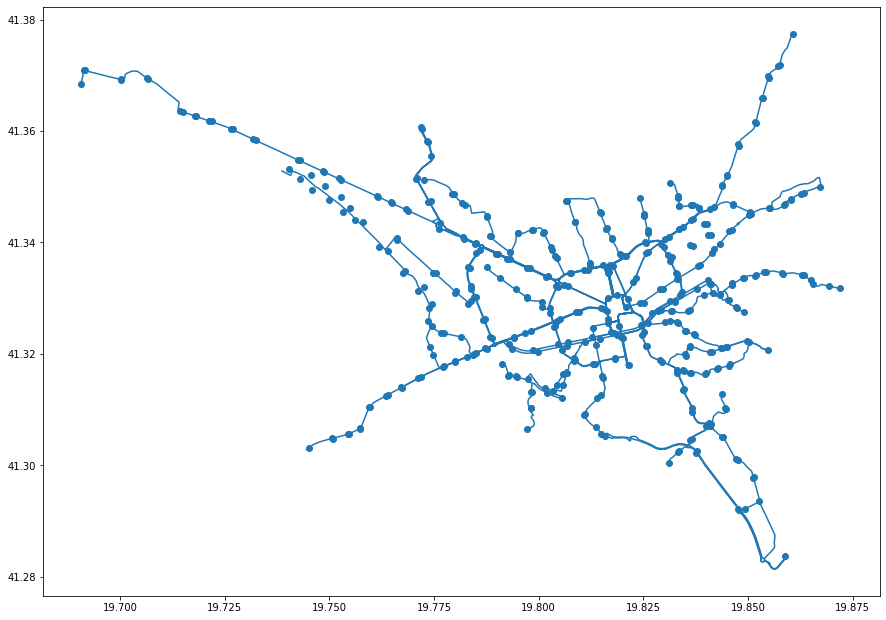

In [74]:
fig, ax = plt.subplots(figsize = (15,15))
route_1.plot(ax = ax)

In [75]:
#convert all these to a graph for more easy manipulation
route_1.head()

,Id,RRUGA,name,description,stroke,stroke-opacity,fill-opacity,EMERTIMI,EMERTIMI_L,linja,geometry
0,0,Siri Kodra,None,None,None,NaN,NaN,None,None,None,POINT (19.80661 41.34748)
1,0,Siri Kodra,None,None,None,NaN,NaN,None,None,None,POINT (19.81477 41.34531)
2,0,Siri Kodra,None,None,None,NaN,NaN,None,None,None,POINT (19.81458 41.34543)
3,0,Siri Kodra,None,None,None,NaN,NaN,None,None,None,POINT (19.81742 41.34077)
4,0,Siri Kodra,None,None,None,NaN,NaN,None,None,None,POINT (19.81740 41.34061)


In [77]:
grouped_stations = route_1.RRUGA.value_counts()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 [Text(0, 0, 'Autostrada Tiranë-Durrës'),
  Text(1, 0, 'Elbasanit'),
  Text(2, 0, 'Dibrës'),
  Text(3, 0, 'Pjeter Budi'),
  Text(4, 0, 'Myslym Keta'),
  Text(5, 0, 'Ali Demi'),
  Text(6, 0, 'Teodor Keko'),
  Text(7, 0, 'Ali Shefqeti'),
  Text(8, 0, '3 Deshmoret'),
  Text(9, 0, 'Konferenca e Pezes'),
  Text(10, 0, 'Kavajes'),
  Text(11, 0, 'Don Bosko'),
  Text(12, 0, 'Kastriotët'),
  Text(13, 0, 'Dritan Hoxha'),
  Text(14, 0, 'Siri Kodra'),
  Text(15, 0, 'Muhamet Deliu'),
  Text(16, 0, 'Fuat Toptani'),
  Text(17, 0, 'LLazi Miho'),
  Text(18, 0, 'Bardhyl'),
  Text(19, 0, 'Rexhep Pinari'),
  Text(20, 0, '7 Nentori'),
  Text(21, 0, 'Sulejman Delvina'),
  Text(22, 0, 'Xhanfize Keko'),
  Text(23, 0, 'Pasho Hysa'),
  Text(24, 0, 'Shefqet Ndroqi'),
  Text(25, 0, 'Blv. “Bajram Curri”'),
  Text(26, 0, 'Ferit Xhajko'),
  Text(27, 0, 'Kongresi Manastirit'),
  Te

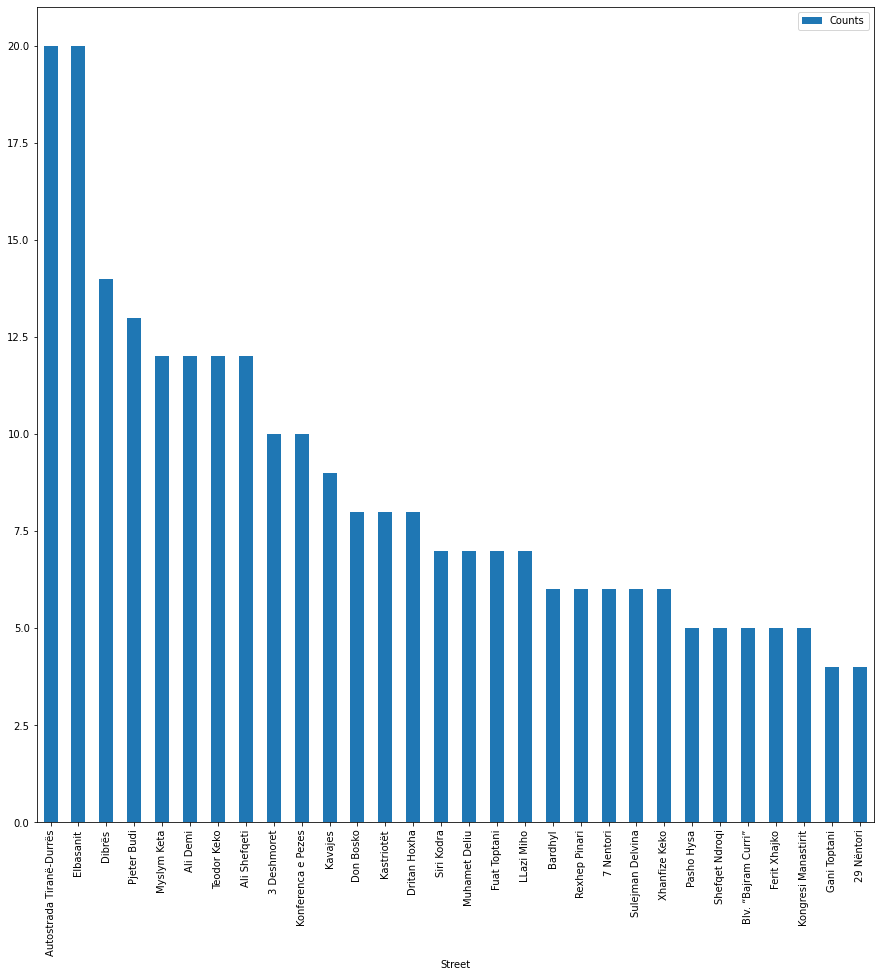

In [78]:
v = grouped_stations.values
k = grouped_stations.index.values
plotted = pd.DataFrame(data = {"Street": k , "Counts": v})
fig, ax = plt.subplots(figsize = (15,15))
plotted.head(30).plot.bar(x='Street', y='Counts', rot=0, ax=ax)
plt.xticks(rotation=90, horizontalalignment="center")

The "Tirane-Durres" highwaw has the most bus stops, followed by Elbasani and Dibra Streets. I am interested in determining if these stops are distributed evenly in terms of the population. That is, is the number of bus stops proportional to the people living in an administrative area? To do so, we must first figure out how to classify these streets or bus stops into their respective areas. Let's do so via GeoPandas' "within function".

In [79]:
list_areas = []
route_1_contained = []
for p in route_1.iterrows():
    for d in states.iterrows():
        if p[1][10].within(d[1][9]):
            list_areas.append(d[1][5])
            route_1_contained.append(p[1][10])

In [80]:
print(len(list_areas),len(route_1_contained))

574 574


<AxesSubplot:>

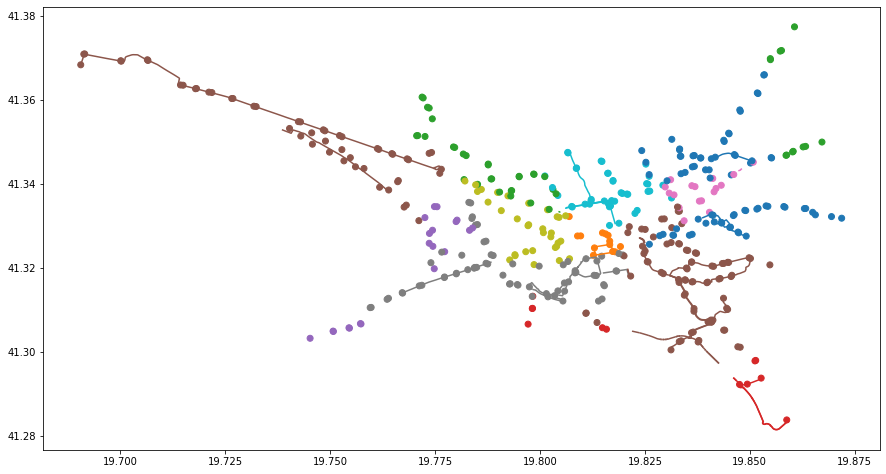

In [81]:
data_frame = pd.DataFrame(data = {"Stops":list_areas , "geometry": route_1_contained})
data_frame = GeoDataFrame(data_frame)
fig, ax = plt.subplots(figsize = (15,15))
data_frame.plot(column="Stops", ax = ax)

Now, we have a colored plot of bus stops, divided by the areas they are found in. We can start answering the question about whether there are enough stops for people in each area.

<AxesSubplot:xlabel='Pop_area', ylabel='Counts'>

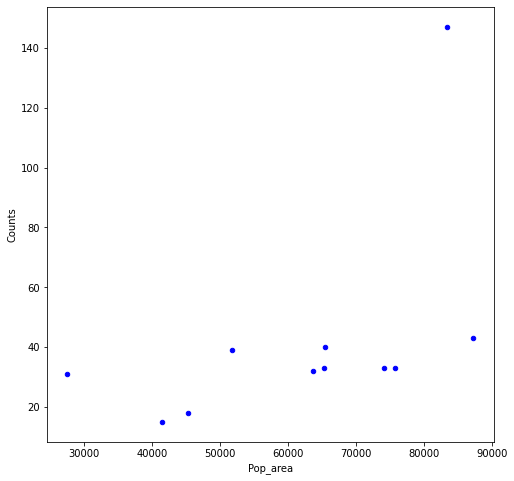

In [82]:
g = data_frame.groupby(['Stops']).size()
v = g.index.values
k = g.values
new_k = [39, 147, 18, 40, 43, 33, 33, 15, 32, 31, 33]
da = pd.DataFrame(data = {"Pop_area": population_list_of_11[:11], "Counts": new_k})
fig, ax = plt.subplots(figsize = (8,8))
da.plot(kind='scatter',x='Pop_area',y='Counts',color='blue', ax = ax)

Interestingly, there does not seem to be a strong linear relationship between population count and number of bus stops. In fact, with increasing population count, the number of stops seems to stay constant (around 40). There is one outlier with more than 140 stops, despite not having the highest population count, and that specific area is area 2.

Let's get a better idea about some normalized count of bus stops and for that we can use density/bus counts. For the densities, we have computed them before so we can easily calculate the necessary metric here as well:

<AxesSubplot:xlabel='Name'>

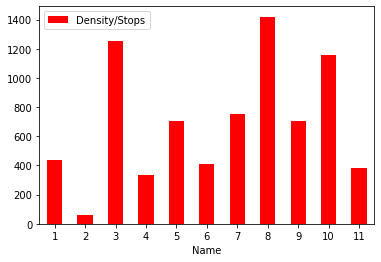

In [83]:
d = list(df_pop_ad.Density)
density_stops = [a / b for a, b in zip(d, new_k)]
da["Density/Stops"] = density_stops
da["Name"] = np.arange(1,12)
da.sort_values(by=['Density/Stops'], ascending = False).plot.bar(x = 'Name', y='Density/Stops', rot=0, color = "red")

Now, the data tells a different story. Firstly, to continue from above, area 2 actually has a pretty low normalized bus score, while other areas like the 8th ,3rd and 10th have very bus scores according to our metric. 

## Driveability Scores

In [29]:
G = ox.graph_from_place('Tirana')
F = ox.graph_from_place('Tirana', network_type = 'bike')

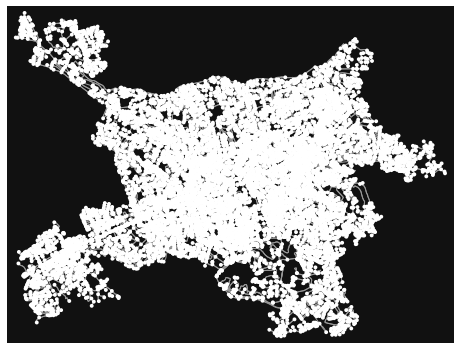

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [12]:
ox.plot_graph(G)

In [19]:
# how driveable a city is (road length/ population): unit road length/person

In [23]:
list_pop_road_len = []
pops = df_pop_ad.Population
for i in range(len(df_pop_ad.geometry)):
    trunc_g = ox.truncate.truncate_graph_polygon(G, df_pop_ad.geometry[i])
    list_pop_road_len.append(ox.stats.edge_length_total(trunc_f)/pops[i])

<AxesSubplot:>

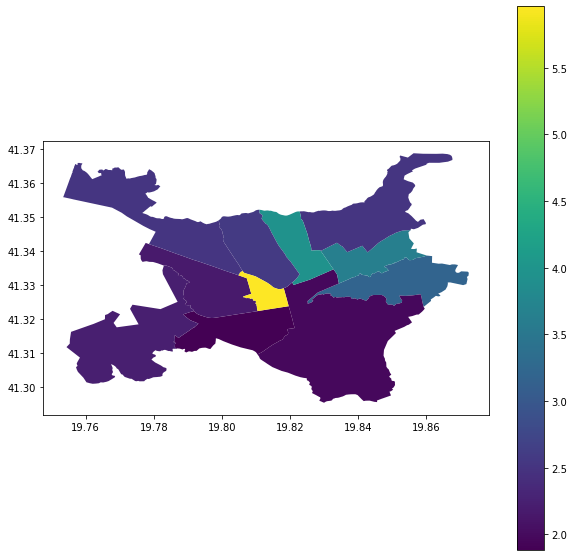

In [21]:
fig, ax = plt.subplots(figsize = (10,10))
df_pop_ad = GeoDataFrame(df_pop_ad)
df_pop_ad['Proportion_Driveable'] = list_pop_road_len
df_pop_ad.plot(column="Proportion_Driveable", legend=True, ax = ax)

## Bikeability Scores

In [ ]:
# how well spread the routes are throughout the city?

In [13]:
list_truncated = []
for i in df_pop_ad.geometry:
    trunc_g = ox.truncate.truncate_graph_polygon(G, i)
    trunc_f = ox.truncate.truncate_graph_polygon(F, i)
    list_truncated.append(ox.stats.edge_length_total(trunc_f) / ox.stats.edge_length_total(trunc_g))

In [5]:
# map this

<AxesSubplot:>

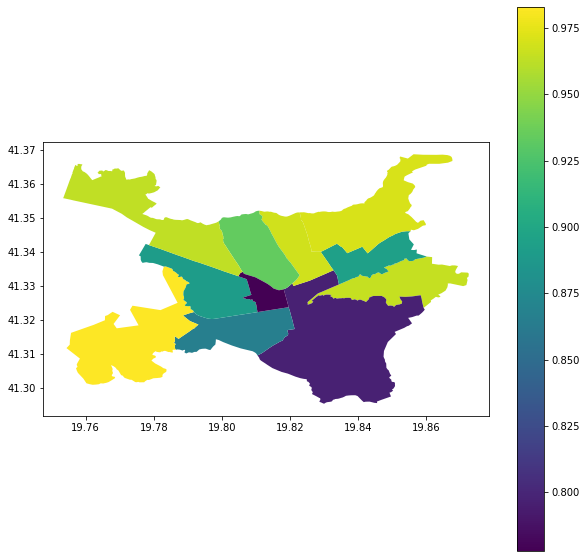

In [18]:
fig, ax = plt.subplots(figsize = (10,10))
df_pop_ad = GeoDataFrame(df_pop_ad)
df_pop_ad['Proportion_Bike'] = list_truncated
df_pop_ad.plot(column="Proportion_Bike", legend=True, ax = ax)

In [17]:
# how much bike routes there are in proportion to population? To total routes? To driveable routes?


In [4]:
ox.stats.basic_stats(G)

{'n': 1996,
 'm': 4081,
 'k_avg': 4.089178356713427,
 'edge_length_total': 184632.32400000002,
 'edge_length_avg': 45.24193187944132,
 'streets_per_node_avg': 2.4308617234468937,
 'streets_per_node_counts': {0: 0, 1: 645, 2: 6, 3: 1189, 4: 153, 5: 2, 6: 1},
 'streets_per_node_proportions': {0: 0.0,
  1: 0.32314629258517036,
  2: 0.003006012024048096,
  3: 0.595691382765531,
  4: 0.07665330661322645,
  5: 0.001002004008016032,
  6: 0.000501002004008016},
 'intersection_count': 1351,
 'street_length_total': 110213.37899999991,
 'street_segment_count': 2373,
 'street_length_avg': 46.44474462705433,
 'circuity_avg': 1.0624847323647464,
 'self_loop_proportion': 0.002107037505267594}

In [2]:
# edge length of bike routes
ox.stats.edge_length_total(G)
# length of total routes
ox.stats.edge_length_total(F)
# proportion of bike vs. total
ox.stats.edge_length_total(G) / ox.stats.edge_length_total(F)
# bike intersections
ox.stats.intersection_count(G, min_streets=2)
# bike streets per node proportions
ox.stats.streets_per_node_proportions(G)

NameError: name 'ox' is not defined